
# Project: Investigation of the TMDb Movie dataset - Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The report includes my analysis on the TMDb Movie dataset. The dataset contains about 10,000 movies' data that were released between 1960 and 2015. The datset contains records like popularity, genre, year of release, budget, revenue, rating and so on. This dataset gives us a good insight into the various trends of people's liking, the various genres that were created and liked. Since the dataset has data between a long period of time, it gives us a good comparison of changing trends.

### Questions that were tried to address:

1. Trends in popularity: <br>
    a. Are movies more popular today or in the yesteryears?<br>
    b. How are revenues impacted with popularity?<br>
<br>
2. Trends in Genres:<br>
    a. Which Genre movies were most made?<br>
    b. What genres are more popular?<br>
    c. Which genres have good budget to revenue conversion?<br>



In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

During Data wrangling, the data is first loaded and checked for cleanliness. The main task would be to look for Null values, erroneous data, duplicates and unnecessasary data for the research. All the data in the dataset may have some use of its own, but not necessary for my research.

### General Properties
1. Look for Null <br>
2. Erroneous data <br>
3. Duplicates<br>
4. Data that is not necessary for research<br><br>

Firstly, I'll be loading the data and checking the dataset.

In [84]:
# load 'tmdb-movies' dataset from csv
movies_df = pd.read_csv('tmdb-movies.csv')
#check the first 5 records
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now, we check the size of the dataset, the basic statistical data and information on datatypes and Null values using shape, describe() and info() respectively.

We notice that there are pipe separated data also in fields like Genre, cast and production.

In [85]:
#checking the number of records and columns
movies_df.shape

(10866, 21)

In [87]:
#understading the basic statistics of the dataset
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [88]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We can notice there are *10,866* records in the dataset. This could include duplicates and rows with erroneous data also. There are *21* columns and all may not be useful for us. <br>
We can notice that there are values missing in imdb_id, homepage, cast, tagline etc. We can either remove those missing rows if their count is less or we can replace null values by mean or median.

From the describe(), we can note that there are nearly 50% data with budget and revenue as 0. we will have to correct this data to make appropriate findings.


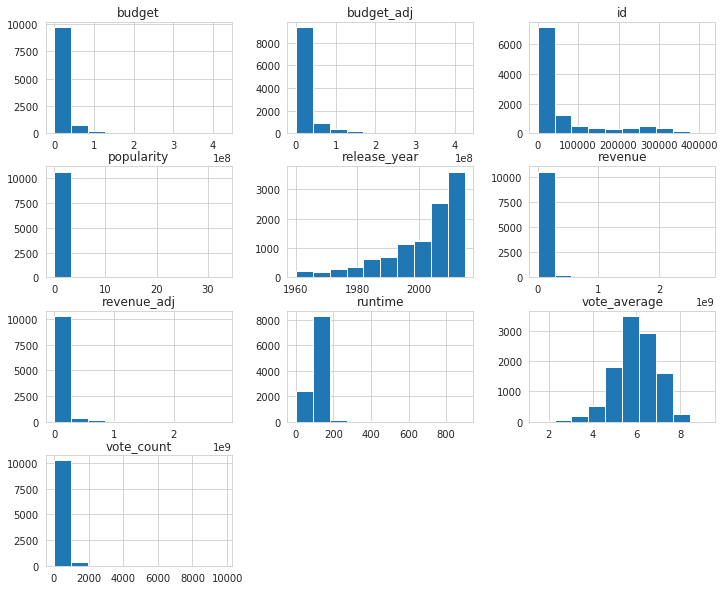

In [89]:
movies_df.hist(figsize=(12,10));

The following observation can be made from the histograms:

1. The number of movies release has increased over the years gradually. <br>
2. The voting average trends show that most votes have given average rating.<br>
3. The runtimes have rarely crossed 200 minutes.<br>

We now check the number of duplicate row.

In [90]:
movies_df[movies_df.duplicated()].count()['id']

1

In [91]:
# check the number of null values in each column
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We notice there are a lot of **Null** values in the *homepage, tagline, keywords and production companies.*.

Since there are not not required for our analysis, we couls straight away *drop* them.

Now we check if there are errorneous data.

In [92]:
#check movies with '0' budget.
movies_df.query("budget == 0").count()['id']

5696

In [93]:
##check movies with '0' revenue.
movies_df.query("revenue == 0").count()['id']

6016

In [94]:
# #check movies with '0' runtime.
movies_df.query("runtime == 0").count()['id']

31

We notice there are **5696** erroneous budget and **6016** revenue details with 0 dollars. This cannot be true since no movie can be made free of cost. This data will have to be replaced with Null values so that it does not affect our analysis.

We cannot delete these rows since the number if large and we will lose a lot of important data in the process.

Similarly for runtime, we have found 31 records with 0 values. The runtime cannot be 0 for any film, so we can replace them by Null.

### Data Cleaning - Cleaning Movies data for accurate analysis. 

Firstly, let us remove the columns that we do not need for our analysis.
Those are **'imdb_id', 'homepage', 'tagline', 'overview', 'cast', 'director', 'production_companies'**.

In [95]:
movies_df.drop(['imdb_id', 'homepage','tagline','overview','cast','director','production_companies'],axis=1, inplace=True)
movies_df.head()

,id,popularity,budget,revenue,original_title,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [96]:
#drop the duplicate records from the dataframe
movies_df.drop_duplicates(inplace=True)

In [97]:
#replace 0s with Null values in budget
movies_df['budget'] = movies_df['budget'].replace({0:np.nan})

In [98]:
#replace 0s with Null values in budget
movies_df['revenue'] = movies_df['revenue'].replace({0:np.nan})

In [99]:
#replace 0s with Null values in budget
movies_df['runtime'] = movies_df['runtime'].replace({0:np.nan})

In [100]:
#drop the records with Null values in cast, director, genres.
movies_df.dropna(subset=['genres'],how='any',inplace=True)

We had found a small number of Null values for *genre*. So we have dropped those records as they would not affect our analysis as such.

<a id='eda'></a>
## Exploratory Data Analysis

Since we are done with the cleaning and the dataframe looking good, we can continue on our analysis. Now we move on to find answers to questions that we had posed.

### 1. Trends in popularity

**a. Are movies more popular today or in the yesteryears?**<br>
    To answer this, we will plot a line graph showing the plot of popularity versus years. This will show us the gradient to be increasing or decreasing as per trend.

We first calculate the mean and the median so that we can plot both on the same graph to check how both fare up.

In [101]:
#calculating the mean of popularity over the years
mean_popularity = movies_df.groupby('release_year').mean()['popularity']
mean_popularity.head()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
Name: popularity, dtype: float64

In [102]:
#calculating the median of popularity
median_popularity = movies_df.groupby('release_year').median()['popularity']
median_popularity.head()

release_year
1960    0.268273
1961    0.265092
1962    0.299075
1963    0.249940
1964    0.194472
Name: popularity, dtype: float64

The mean and median is calculated for each year using the **'release_year'** column. We **group** the data by release year and then calculate the mean or median so that we get the mean/median for each year for all movies release in that particular year.

This helps us plot the popularity per year for the movies.

Now we plot the graph using matplotlib.pyplot

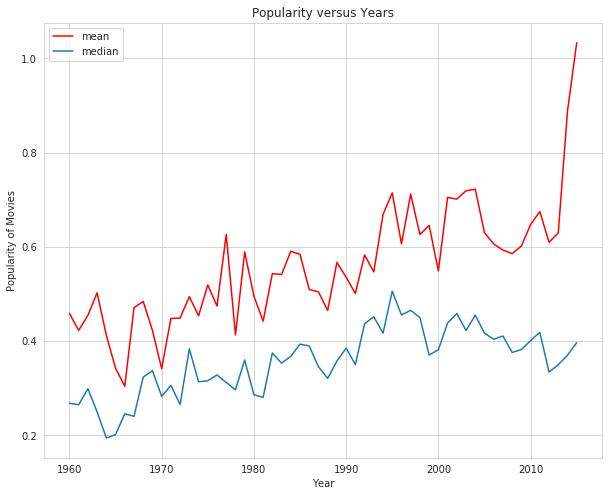

In [103]:
#setting the graph background
sns.set_style('whitegrid')

plt.subplots(figsize=(10,8))
#plotting the mean of popularity
mean_popularity.plot(color='r', label='mean')

#plotting the median popularity against year
median_popularity.plot(label='median')
#naming the x and y axes and the title
plt.title('Popularity versus Years')
plt.xlabel('Year')
plt.ylabel('Popularity of Movies');
plt.legend();

We note that the popularity of movies has been on the rise. The mean on popularity sees an exponential growth in the recent years. This can be attributed to more number of votes that may be cast, since people in recent years have better access to movies in the internet age. 

The plot of median is slightly steady when compared to mean but we can clearly note that there in an **increase in the popularity of movies** over the years. This can be because people have **better access to movies** today due to the *internet*.

**b. How are revenues impacted with popularity?**

Now let us check how the revenue levels fare against the popularity index. For this I will be considering only the latest 5 years since there are a lot many years to compare. The latest 5 year data will give us a good insight to the trend.

We will divide the revenue into four levels, namely: <br>
- Low<br>
- Medium<br>
- Moderately high<br>
- High<br>

We will be using **min, 25%, 50%, 75% and the max** values in order to calculate the levels. I have used the pandas cut funtion to divide the revenue into the selected bins. The creation of bins makes plotting graphs and understanding them more clear instead of plotting numbers directly.


In [114]:
# find quartile, max and min values
df_recent = movies_df.query("release_year > 2010")
min_value = movies_df['revenue'].min()
first_quantile = movies_df['revenue'].describe()[4]
second_quantile = movies_df['revenue'].describe()[5]
third_quantile = movies_df['revenue'].describe()[6]
max_value = movies_df['revenue'].max()

# Bin edges will be used to divide the data into groups
bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]

# The four budget level groups
bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 

# Creates budget_levels column
name = '{}_levels'.format('revenue')
df_recent[name] = pd.cut(movies_df['revenue'], bin_edges, labels=bin_names, include_lowest = True)
df_recent.head(10)


/home/gautam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,popularity,budget,revenue,original_title,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,High
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,High
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,High
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,High
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,father-son relationship|rape|based on novel|mo...,156.0,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,High
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,saving the world|artificial intelligence|cybor...,125.0,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,High
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,based on novel|mars|nasa|isolation|botanist,141.0,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,High
8,211672,7.404165,74000000.0,1.156731e+09,Minions,assistant|aftercreditsstinger|duringcreditssti...,91.0,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,High
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,dream|cartoon|imaginary friend|animation|kid,94.0,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,High


We can note in the result that the new column 'revenue_levels' has been created with the corresponding level mentioned. Since we replaced '0' revenue with NaN, we see that the revenue levels is also NaN. 

Now we group the data as per the year of release and the revenue level. This gives us the revenue stats for each year with the levels. 

In [105]:
# group the dataframe we created above with each revenue levels in each year, find the popularity meadian
dfrecent_summary = df_recent.groupby(['release_year','revenue_levels']).median()
dfrecent_summary.tail()

id  popularity      budget      revenue  \
release_year revenue_levels                                                   
2014         High             171536.0    3.160100  65000000.0  241389711.5   
2015         Low              293281.5    0.572387   8000000.0     965064.5   
             Medium           273477.0    1.046518  14500000.0   16661077.0   
             Moderately High  274541.0    1.696682  16500000.0   59339326.5   
             High             254128.0    3.877764  77500000.0  240360392.0   

                              runtime  vote_count  vote_average    budget_adj  \
release_year revenue_levels                                                     
2014         High               108.5      1618.5          6.45  5.987092e+07   
2015         Low                100.0        87.5          5.90  0.000000e+00   
             Medium             106.0       283.0          6.20  9.199996e+06   
             Moderately High    107.0       575.5          6.40  1.379999e+07   
             High               118.0      1575.0          6.50  6.899997e+07   

                               revenue_adj  
release_year revenue_levels                 
2014         High             2.223419e+08  
2015         Low              8.878589e+05  
             Medium           1.532818e+07  
             Moderately High  5.459216e+07  
             High             2.211315e+08

A bar plot is created with each year having 4 corresponding bars with each bar representing the revenue level. This helps us compare the revenues per year.



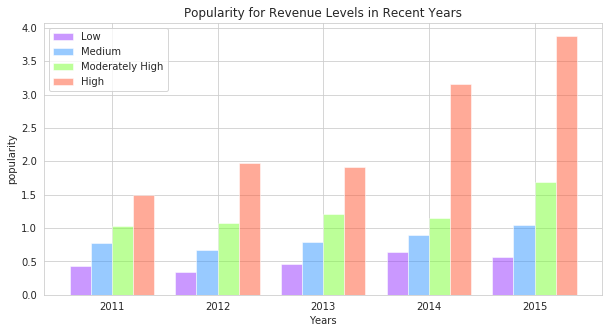

In [106]:
# positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 
sns.set_style('whitegrid')

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

#Bar with Low data, in position pos,
plt.bar(pos, dfq2_summary.query('revenue_levels =="Low"')['popularity'], width, alpha=0.5, 
        color='#9633FF', label= 'Low') 

#Bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], dfq2_summary.query('revenue_levels =="Medium"')['popularity'], width, alpha=0.5, 
        color='#3396FF',label='Medium') 

#Bar with Moderately High data,
plt.bar([p + width*2 for p in pos], dfq2_summary.query('revenue_levels =="Moderately High"')['popularity'], 
        width, alpha=0.5,color='#7AFF33',label='Moderately High') 

# Create a bar with High data,
plt.bar([p + width*3 for p in pos], dfq2_summary.query('revenue_levels =="High"')['popularity'], width, 
        alpha=0.5, color='#FF5733', label='High')

# Set the x and y axis label
ax.set_ylabel('popularity')
ax.set_xlabel('Years')
# Set the chart's title
ax.set_title('Popularity for Revenue Levels in Recent Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
# Set the labels for the x ticks
ax.set_xticklabels([2011,2012,2013,2014,2015])
# Adding the legend and showing the plot
plt.legend();

The plot is quite amazing! We can note the each year the popularity is *directly proportional* to the *revenue*. The means that if a movie is popular among people, then more people go out and watch the movie. Hence marketing the movies makes sense. if people have knowledge about a movie, there are a lot of chances that people go out and watch them.

Also, popularity of movies as a whole is increasing every year. This could be the rise of Internet. More prople have idea about the movie industry and follow them.

**The movie industry is Booming!**

### Trends in Genres

**a. Which Genre movies were most made?**<br>


Since the genre column of the movies dataframe contains pipe separated values, we need to first separate those values so that we can compare them. We have already taken care of the Null values. The following code splits the data by '|' and retrieves data into a python list.

Note: the list will have values repeated since each genre can be associated with  lot of movies.

In [107]:
# get the list of all possible genres.
genres_list = movies_df['genres'].str.cat(sep='|').split('|')
#seeing the first 10 obtained - sample
genres_list[:10]

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Adventure',
 'Science Fiction']

Once we get the list of all the genres, we create a dataframe of the genres. Using the dataframe, we could get the genres with the most number of recurrances. These recurring genres are associated with all the movies created in that genre.

In [108]:
#creating dataframe of genres
genres_df = pd.DataFrame({'genre':genres_list})
# getting the count of each genre
top_genres = genres_df['genre'].value_counts().head(10)
top_genres

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Name: genre, dtype: int64

Now that we have the top 10 genres, we can plot a pie chart to visualize what part of the industry produces each of there Genres.

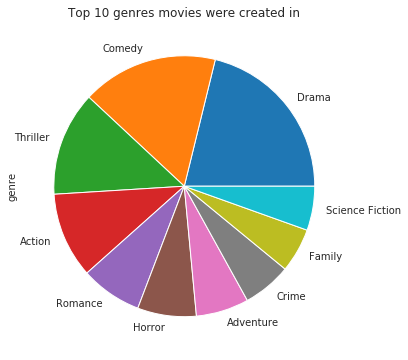

In [109]:
plt.subplots(figsize=(6,6))
top_genres.plot.pie();
plt.title("Top 10 genres movies were created in");

From the Pie chart, it is clear that of the top 10 Genres, **'Drama'** movies were the most made followed by **Comedy**.  

**b. What genres are more popular?**

To check the popularity, I decided to get the popularity of each movies and create a dataframe by adding that particular popularity rating against all the Genres that the movies is part of. In this way we get to calculate the mean popularity obtainied by all the Genres. 

A function **'get_genre_property'** has been designed that takes care of retrieving the property associated with the Genres. For example, when popularity of all the genres is required, we pass 'popularity' as a parameter to the function. The funtion retrieves all the popularity ratings, places it against the genres the movie belongs to. This can be done for budget, revenue as well. 

In [110]:
#funtion definition
def get_genre_property(property):
    #retreive genres and required property
    genre_property=movies_df[['genres',property]]
    genre_property_list = []
    
    #iterate through each record
    for index,column in genre_property.iterrows():
        #since each movie has many genres, get all genres using split
        current_movie = column['genres'].split('|')
        #get property value
        current_property = column[property]
        
        #Iterate each genre of current movie
        for each_genre in current_movie:
            #place property value againt the genre
            genre_property_list.append([each_genre,current_property])
            
    genre_property_list
    #create a dataframe from the list that is created and retrun the dataframe.
    genre_property_df = pd.DataFrame(genre_property_list,columns=['genres',property])
    return genre_property_df

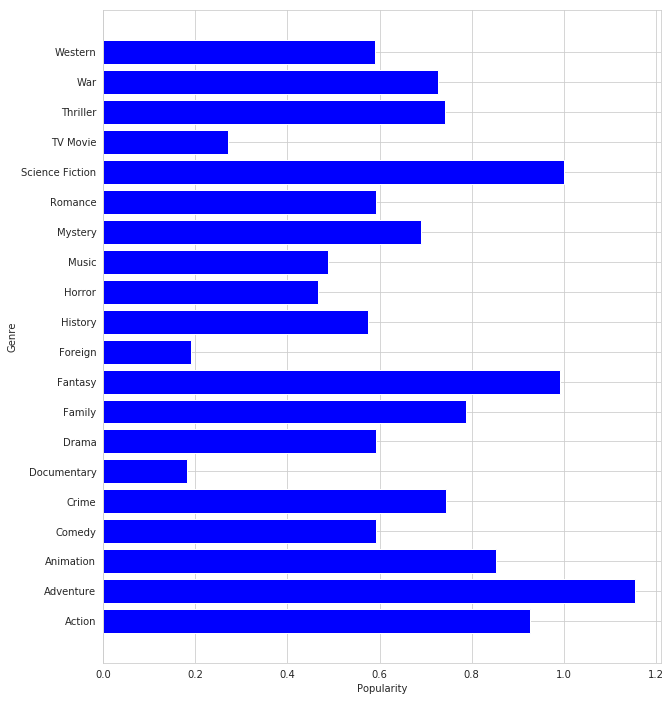

In [111]:
# getting dataframe of genre and popularity
genre_popularity_df = get_genre_property('popularity')
#calculate the mean popularity of each genre
mean_genre_popularity = genre_popularity_df.groupby('genres').mean()
plt.subplots(figsize=(10,12))
#plotting horizontal bar
plt.barh(mean_genre_popularity.index, mean_genre_popularity['popularity'], color='b')
plt.xlabel('Popularity')
plt.ylabel("Genre");

From the graph it is noticed that **Adventure, Fantasy, Science Fiction** are quite popular with people. People who watch there movies are fond and we need to create more movies in them. The cost can be a factor in creating these movies. The movies of these Genres are quite costly to make. 

People like Adventure and Science Fiction!

**c. Which genres have good budget to revenue conversion?**

We use the **get_genre_property()** function to retrieve the respective budget and revenue figures of every genre. 
We then join them to one dataframe so that we can plot a bar chart with both budget and revenue represented for each genre.

In [112]:
#getting the budget for each genres
budget = get_genre_property('budget')
print(len(budget))
#calculating the mean of the budgets for each genre
mean_budget = budget.groupby('genres').mean()

#getting the revenue for each genres
revenue = get_genre_property('revenue')
print(len(revenue))
#calculating the mean of the revenues for each genre
mean_revenue = revenue.groupby('genres').mean()
final_df = mean_budget.join(mean_revenue)
final_df

26955
26955


,budget,revenue
genres,,
Action,4.629070e+07,1.377323e+08
Adventure,6.095670e+07,1.974209e+08
Animation,6.226418e+07,2.219578e+08
Comedy,2.898793e+07,8.037100e+07
Crime,2.906049e+07,7.421367e+07
Documentary,4.689337e+06,1.040564e+07
Drama,2.441806e+07,6.118977e+07
Family,5.498154e+07,1.738114e+08
Fantasy,5.880537e+07,1.913738e+08


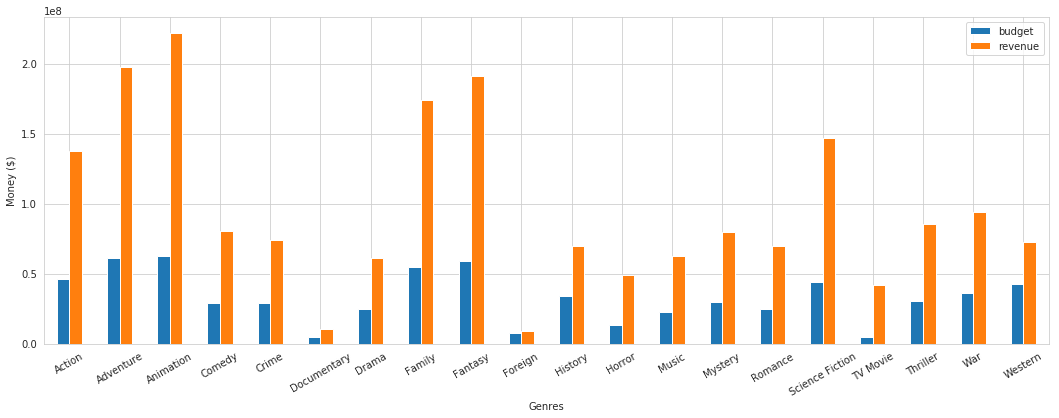

In [113]:
#plotting the budget/revenue versus genre
final_df.plot.bar(rot=0, figsize=(18,6))
#rotating the labels in x-axis for readability
plt.xticks(rotation=30)
plt.xlabel("Genres")
plt.ylabel("Money ($)")
plt.show()

**The movie industry is quite profitable!** 

The revenues were best in terms of value for Animation, Adventure, Fantasy, Family and Science fiction. this can also be attributed to the popularity of these genres as was seen in the previous question.

If we notice the budget to Revenue conversion, I think that TV film have the best revenue compared to their budget. This can be because the cost of making is quite low and income from Ads is quite high.

<a id='conclusions'></a>
## Conclusions

The main aim of this research was to explore the following 2 trends.

### 1. Trends in Popularity

Going through the popularity data and the graph that was plotted, I could notice that movies are here to stay! More and more people follow movies and their production houses. That is why the popularity has been increasing over the years and is the best in the recent years. Since people have better access to films and related information, people do follow the movie industry and watch films. The growth has been steady ove the years but looks to better in the coming years.

Since the popularity is increasing, we can also note an increase in the revenue of the movies. This is a very good sign for the industry. More movies can be made with trust on the people since people do go out and watch the films. As years went, revenues increased with popularity.


### 2. Trends in Genres

Genre is something depends on liking of different people. I may like Science fiction and you may like Romance. Hence it is necessary for the industry to make films of all sorts. But looking at the trends, we see that the industry mostry makes films in the 'Drama', 'Fantasy' genres and given people less chance to explore. This has improved over the years.

The popularity of Adventure, Science Fiction, Animation was higher. The industry need to make more of these films. These films are profitable as well as saw from the budget-revenue graph. The revenue is good for these Genres. The cost of making is high for these genres but if the movie is popular, the revenues are also proportional.


Researching the Movies dataset was a great experience since the dataset has lot of meaningful information. Getting the right insights was well learnt from this experience! Being a movies fan, This did give me a good knowledge of the industry! 

                                                                              -Gautam Gadiyar